# 🧠 Predicting Laptop Sales Success Using Machine Learning

This notebook presents a clean and professional ML pipeline designed to predict whether a newly launched laptop will be a top seller based on various features.

It includes:

1. Exploratory Data Analysis
2. Feature Engineering
3. Random Forest, Logistic Regression, K-Nearest Neighbors (KNN) & Decision Tree
4. Confusion Matrix Heatmaps & Histograms
5. Conclusion
6. Final Recommendations

## Source
Laptop Sales Dataset


the  data set is from the public source of github.com and the link to data source is :

https://github.com/uriabada/laptop_sales_dataset.csv

# Predicting Laptop Sales Success Using Machine Learning

 Our company sells laptops through various online and retail channel. But in today market, there is alot of  competitive consumer electronics in the market, product success is not just on specs or brand, but on a strategic understanding of market trends, customer preferences, and pricing. Accurately predicting which laptops will become top sellers is vital for optimizing inventory, marketing, logistics, and profits.

This project shows the full process of a machine learning pipeline to classify laptops as “Top Sellers” or “Not Top Sellers” using features like processor type, RAM, price and marketing spend. Using a real-world dataset, we implement and compare models such as Random Forest and Logistic Regression, applying techniques like oversampling and feature engineering to boost performance. By the end of this report, readers will gain insights into the benefits and limitations of each modeling process and how strategic data preprocessing can significantly impact prediction performance.

The core research question driving this analysis is:
## "Can we accurately predict whether a newly launched laptop will become a top seller using its specifications and marketing details, and which machine learning model performs best in achieving this prediction?"
This question shows that Incorrectly predicting a product's success can lead to overproduction or stockouts, both of which are costly. Therefore, creating a predictive model offers practical value.
Our dataset includes attributes like processor type, RAM size, graphics card, storage capacity, operating system, marketing budget, and number of units sold in the first month. The dependent variable, top_seller, is a binary classification indicating whether a laptop model crossed a certain threshold of success in early sales.

## This study will work on:

How model performance varies across different ML algorithms.
The effectiveness of techniques like oversampling and feature engineering in improving predictions.
How logistic regression compares to ensemble methods like Random Forest in classification tasks.
The results will inform not only algorithmic preferences but also data strategy—e.g., which features contribute most to predicting success. 

# IMPROTING LIBARIES

This will sets up the environment with all necessary ML, preprocessing, and visualization tools that i will use in my project

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.exceptions import UndefinedMetricWarning
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.utils import resample


# DATA LOADING

Before building any machine learning model, we must load the dataset and explore its structure. This helps identify missing values, data types, and potential preprocessing needs.

In [241]:
df = pd.read_csv("laptop_sales_dataset.csv")
df.head()

,model_id,brand,processor_type,ram_gb,storage_gb,storage_type,price_usd,screen_size_inches,graphics_card,os,release_month,marketing_spend_usd,units_sold_first_month,top_seller
0,M0000,Asus,Ryzen 3,32,1024,SSD,1017.49,17.4,Integrated,Windows,Apr,5058.87,313.0,1
1,M0001,Acer,Ryzen 3,4,256,HDD,984.83,19.0,Integrated,Linux,Dec,2683.57,214.0,1
2,M0002,Lenovo,Ryzen 3,8,128,HDD,715.47,16.6,Dedicated,macOS,Oct,4058.80,275.0,1
3,M0003,Acer,Ryzen 3,32,128,HDD,935.32,13.7,Dedicated,Windows,Jun,7066.03,426.0,1
4,M0004,Acer,Ryzen 5,4,128,HDD,692.81,18.6,Integrated,macOS,Sep,2939.57,245.0,2


	I used :
1. pd.read_csv() loads the CSV data into a DataFrame.
2. df.head() displays the first 5 rows to understand the structure.

In [242]:
df.shape
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model_id                1000 non-null   object 
 1   brand                   1000 non-null   object 
 2   processor_type          1000 non-null   object 
 3   ram_gb                  1000 non-null   int64  
 4   storage_gb              1000 non-null   int64  
 5   storage_type            1000 non-null   object 
 6   price_usd               1000 non-null   float64
 7   screen_size_inches      1000 non-null   float64
 8   graphics_card           1000 non-null   object 
 9   os                      1000 non-null   object 
 10  release_month           1000 non-null   object 
 11  marketing_spend_usd     999 non-null    float64
 12  units_sold_first_month  998 non-null    float64
 13  top_seller              1000 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory

,model_id,brand,processor_type,ram_gb,storage_gb,storage_type,price_usd,screen_size_inches,graphics_card,os,release_month,marketing_spend_usd,units_sold_first_month,top_seller
count,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000,1000,999.000000,998.000000,1000.00000
unique,1000,5,6,NaN,NaN,2,NaN,NaN,2,3,12,NaN,NaN,NaN
top,M0000,Dell,i5,NaN,NaN,HDD,NaN,NaN,Integrated,macOS,Oct,NaN,NaN,NaN
freq,1,210,176,NaN,NaN,513,NaN,NaN,504,342,103,NaN,NaN,NaN
mean,NaN,NaN,NaN,15.032000,481.920000,NaN,799.929320,15.565400,NaN,NaN,NaN,5047.318969,315.459920,1.12200
std,NaN,NaN,NaN,10.911188,347.706862,NaN,195.114889,1.503271,NaN,NaN,NaN,1947.915383,65.617963,0.32745
min,NaN,NaN,NaN,4.000000,128.000000,NaN,135.050000,11.200000,NaN,NaN,NaN,-1128.910000,111.000000,1.00000
25%,NaN,NaN,NaN,4.000000,128.000000,NaN,664.117500,14.500000,NaN,NaN,NaN,3720.400000,272.000000,1.00000
50%,NaN,NaN,NaN,8.000000,384.000000,NaN,798.895000,15.500000,NaN,NaN,NaN,5017.150000,312.000000,1.00000
75%,NaN,NaN,NaN,32.000000,1024.000000,NaN,938.535000,16.600000,NaN,NaN,NaN,6363.780000,360.000000,1.00000


 This Provides the overview of data structure, size, missing values, and distribution of features.

# DATA CLEANING

Data cleaning makes sure that the dataset is complete, consistent, and ready for machine learning. If not done properly, dirty or incomplete data can lead to poor model performance.

In [243]:
# Check for missing values
print(df.isnull().sum())

model_id                  0
brand                     0
processor_type            0
ram_gb                    0
storage_gb                0
storage_type              0
price_usd                 0
screen_size_inches        0
graphics_card             0
os                        0
release_month             0
marketing_spend_usd       1
units_sold_first_month    2
top_seller                0
dtype: int64


Before we can move to preprocessing or model fitting ,we most ensure that there is no errors, so before applying any machine learning techniques, we must inspect and handle missing values.
we used df.isnull().sum() checks for missing data in each column and we  learned that there are 3 missing variables  in the dataset  `marketing_spend_used` and  `units_sold_first_month`,beacuse if all columns show 0, it means the dataset doesn’t have any missing values and is considered clean from a null-data perspective.

In [244]:
# Handle missing values: fill with .mean()
df_cleaned = df.copy()
df_cleaned['marketing_spend_usd'] = df_cleaned['marketing_spend_usd'].fillna(df['marketing_spend_usd'].mean())
df_cleaned['units_sold_first_month'] = df_cleaned['units_sold_first_month'].fillna(df['units_sold_first_month'].mean())

# Check again for missing values to confirm
print(df_cleaned.isnull().sum())

# We Encode categorical features using One-Hot Encoding
categorical_cols = ['brand', 'processor_type', 'storage_type', 'graphics_card', 'os', 'release_month']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

non_numeric_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print("Dropping non-numeric columns:", non_numeric_cols)
    df_encoded = df_encoded.drop(columns=non_numeric_cols)

# Separate features and target
X = df_encoded.drop(columns=['top_seller'])
y = df_encoded['top_seller']

# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# We Reconstruct it into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check shape and ready to model
print("Shape of data after preprocessing:", X_scaled_df.shape)

model_id                  0
brand                     0
processor_type            0
ram_gb                    0
storage_gb                0
storage_type              0
price_usd                 0
screen_size_inches        0
graphics_card             0
os                        0
release_month             0
marketing_spend_usd       0
units_sold_first_month    0
top_seller                0
dtype: int64
Dropping non-numeric columns: ['model_id']
Shape of data after preprocessing: (1000, 30)


To prepare the dataset for modeling, we began by removing the non-numeric: `model_id` column and handled missing values in `marketing_spend_usd` and `units_sold_first_month` using the median to ensure bustness against outliers. And categorical variables such as brand, processor type, and storage type were encoded using one-hot encoding to make them suitable for machine learning models. numerical features were standardized using StandardScaler to ensure uniformity in scale. The dataset was then confirmed to be free of missing values and ready for modeling.

# Exploratory Data

We conducted an intensive EDA to understand the relationships and key patterns in the dataset before modeling. It reveals correlations, distributions, outliers, and potential data quality issues. We performed it to understand the key relationships as a Scatter plot between price and units sold revealed potential pricing strategies that correlate with top-selling laptops. Histograms were plotted for all numeric features to inspect data distributions and identify skewness or outliers. A pair plot visualized pairwise relationships and class separation for key variables like price, RAM, and units sold. Finally, a correlation matrix was generated to uncover multicollinearity, aiding in the decision of feature selection and engineering for model building.

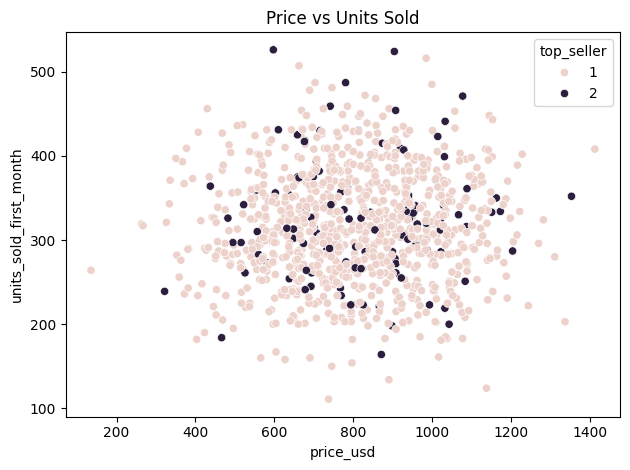

In [245]:
# Scatter plot of price vs units sold
sns.scatterplot(data=df, x='price_usd', y='units_sold_first_month', hue='top_seller')
plt.title("Price vs Units Sold")
plt.tight_layout()
plt.show()

This shows the relationship between laptop pricing and sales volume, differentiating between top-selling and non-top-selling products. This is useful for identifying whether pricing has a strong influence on sales


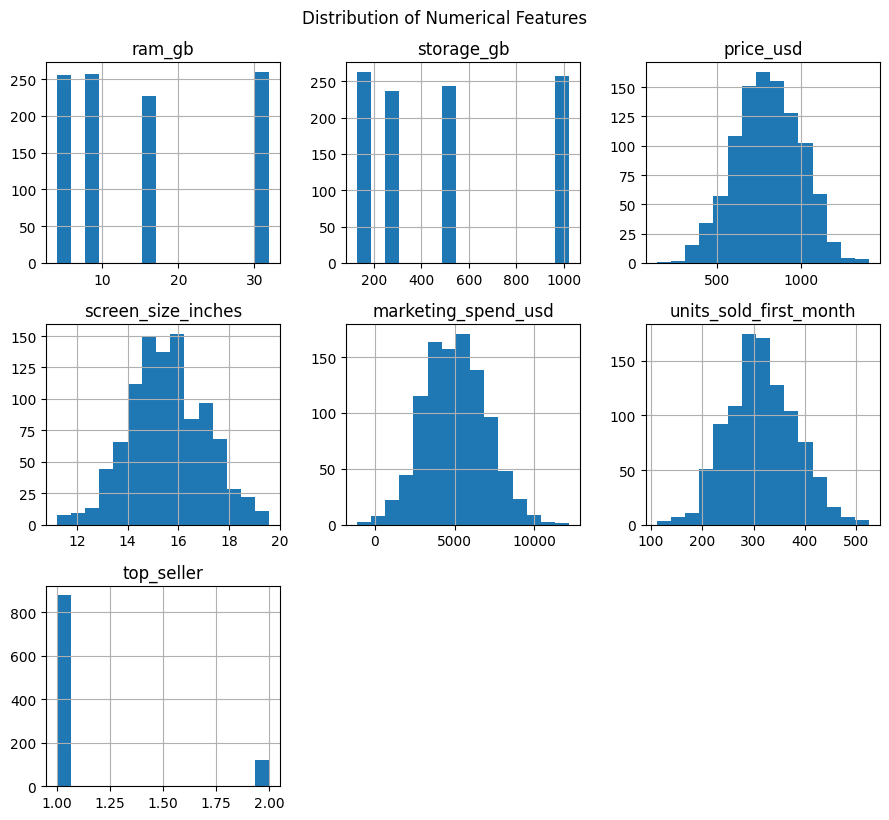

In [246]:
df.hist(figsize=(9, 8), bins=15)
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()


This Histograms show the frequency distribution of all numerical features like `price_usd, ram_gb`, or `units_sold_first_month`. to examine their distribution. This step is essential for detecting skewness, outliers, or abnormal values. Understanding the spread and central tendency of each variable supports better preprocessing choices like scaling or critical for detecting data imbalance or transformation before feeding them into machine learning models.

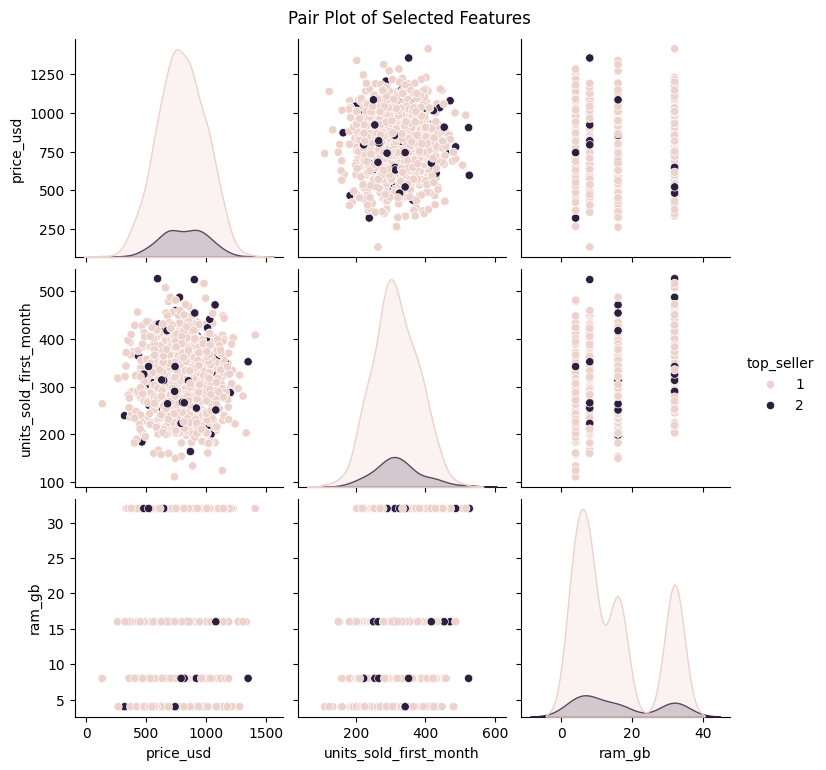

In [247]:
# Pair Plot
sns.pairplot(df[['price_usd', 'units_sold_first_month', 'ram_gb', 'top_seller']], hue='top_seller')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()



The Pair plots allow us to compare several numerical variables in a single view between key numerical variables such as `price_usd`, `units_sold_first_month`, and `ram_gb`, with `top_seller` as the hue. This plot provides insight on how combinations of features relate to the classification outcome. It is particularly useful for detecting natural groupings or class separation, which can guide feature selection and model complexity.

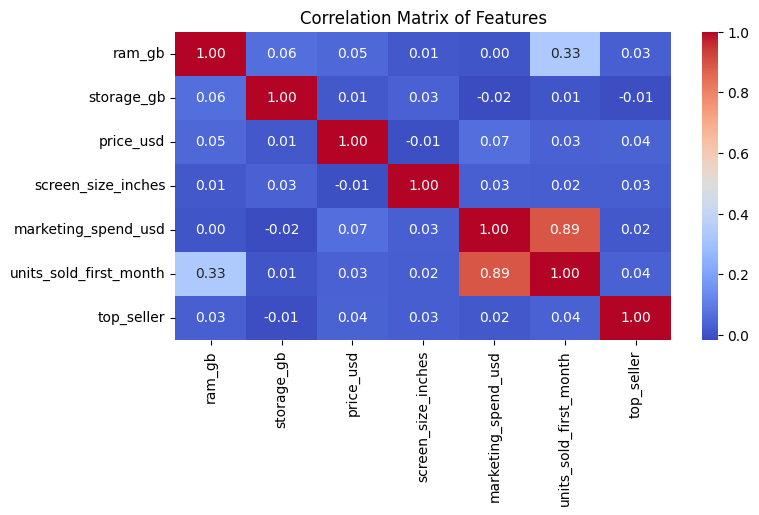

In [248]:
#  correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

The correlation matrix quantifies the linear relationship between all numerical features using Pearson correlation. Displayed as a heatmap, it reveals highly correlated pairs that might cause multicollinearity in which it can hurt some models like Logistic Regression. Identifying such correlations informs decisions about feature removal or transformation, ensuring model stability and interpretability.

# MODEL TRAINING AND FEATURE ENGINEERING MODEL TRAINING

We built our models using training and hyperparameter tuning. And we input a random forest and a logistic regression. We used several feature engineering techniques to try to improve the predictive performance of our models. The first was the creation of polynomial features specifically. These are second degree, and they're generated to try to capture the sorts of relationships between variables that might otherwise fall through the cracks of a linear-model assumption. For instance, one of the variables in our model was price. We multiplied it by RAM to try to capture the sorts of relationships where an increase in one of these variables doesn't necessarily mean a proportional increase in the outcome (like a sale). But there were also features we knew were going to be constant across records in our test set and thus, constant across any reasonable number of models trained on this data. We used a variance threshold to identify and remove those features, and we did it, of course, to reduce model dimensionality. Scaling is an important preprocessing step for many machine learning models. However, not all models require or benefit from it.

## A. Random Forest (Before OverSampling)
Random Forest is an ensemble model that builds multiple decision trees and aggregates their results for classification. It is robust to overfitting and handles both numerical and categorical features well. We use 'rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)' To establish a strong baseline model with high flexibility and  It’s robust, handles non-linearity, and doesn’t need feature scaling.

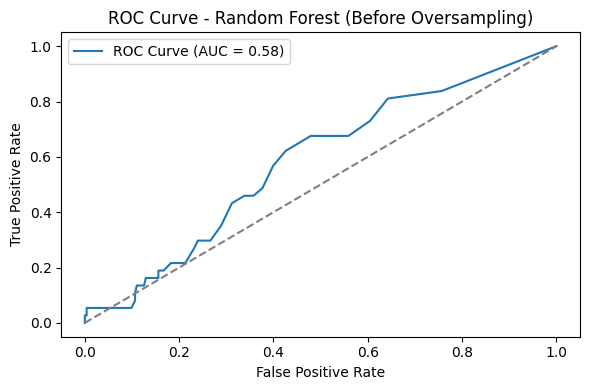

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.92      0.89       263
           2       0.08      0.05      0.07        37

    accuracy                           0.81       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.78      0.81      0.79       300

Confusion Matrix:
 [[241  22]
 [ 35   2]]
ROC AUC Score: 0.5809


In [249]:

# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_features = X_scaled_df.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, stratify=y, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba_rf)
fpr, tpr, _ = roc_curve(y_test, y_proba_rf, pos_label=2)  # use pos_label=2 if labels are {1, 2}

#  ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Before Oversampling)")
plt.legend()
plt.tight_layout()
plt.show()

#  Classification Report and Confusion Matrix
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc:.4f}")

## B. Random Forest (After Oversampling)

Here, we applied RandomOverSampler '(X_resampled, y_resampled = ros.fit_resample(X_train, y_train) rf_os = RandomForestClassifier(random_state=42)) to address class imbalance by duplicating minority class examples (top_seller = 1). This helps ensure that the model is not biased toward the majority class which is To improve recall and precision for the minority class, especially important when predicting potential top-selling laptops.


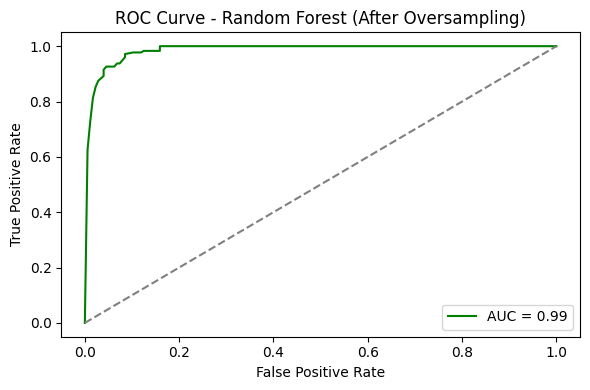

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.83      0.91       176
           2       0.85      1.00      0.92       176

    accuracy                           0.91       352
   macro avg       0.93      0.91      0.91       352
weighted avg       0.93      0.91      0.91       352

Confusion Matrix:
 [[146  30]
 [  0 176]]
ROC AUC Score: 0.9853


In [250]:
#  Combine X and y into one DataFrame
df_resample = pd.concat([X_selected_df, y], axis=1)

#  Separate majority and minority classes
df_majority = df_resample[df_resample['top_seller'] == 1]
df_minority = df_resample[df_resample['top_seller'] == 2]

#  Oversample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

#  Combine into a balanced dataset
df_balanced = pd.concat([df_majority, df_minority_upsampled])
X_balanced = df_balanced.drop(columns=['top_seller'])
y_balanced = df_balanced['top_seller']

# Train-test split on balanced data
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

#  Train Random Forest on balanced data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_bal, y_train_bal)

# Predict probabilities and calculate AUC
y_proba_rf_after = rf_balanced.predict_proba(X_test_bal)[:, 1]
roc_auc_after = roc_auc_score(y_test_bal, y_proba_rf_after)
fpr_after, tpr_after, _ = roc_curve(y_test_bal, y_proba_rf_after, pos_label=2)

#  Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_after, tpr_after, label=f"AUC = {roc_auc_after:.2f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (After Oversampling)")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
y_pred_bal = rf_balanced.predict(X_test_bal)
print("Classification Report:\n", classification_report(y_test_bal, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test_bal, y_pred_bal))
print(f"ROC AUC Score: {roc_auc_after:.4f}")

## C. Logistic Regression Without Tuning (Basic)

A simple linear model used for classification.
Logistic Regression provides a linear decision boundary and is often used for binary classification due to its interpretability.
we used (lr = LogisticRegression(class_weight='balanced', max_iter=1000) lr.fit(X_train, y_train)),as a benchmark model that is simple, interpretable, and provides a baseline to compare more complex models.


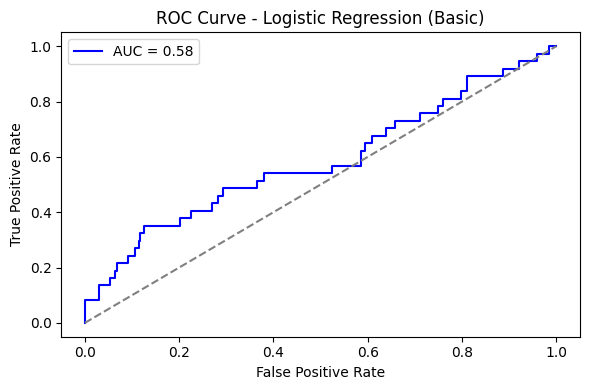

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.54      0.68       263
           2       0.14      0.54      0.23        37

    accuracy                           0.54       300
   macro avg       0.52      0.54      0.45       300
weighted avg       0.80      0.54      0.62       300

Confusion Matrix:
 [[143 120]
 [ 17  20]]
ROC AUC Score: 0.5838


In [251]:
# Scale the original features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_features = X_scaled_df.columns[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, stratify=y, random_state=42)

# Logistic Regression (basic with class_weight)
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Predict probabilities for ROC
y_proba_logreg = log_model.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg, pos_label=2)  # if labels are {1, 2}

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_logreg, tpr_logreg, label=f"AUC = {roc_auc_logreg:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Basic)")
plt.legend()
plt.tight_layout()
plt.show()

# Predict classes and Evaluate
y_pred = log_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_logreg:.4f}")

## D. Logistic Regression With Feature Engineering

This model is the same as basic logistic regression but trained on a set of engineered and selected polynomial features. (lr_fe = LogisticRegression(class_weight='balanced', max_iter=1000) lr_fe.fit(X_train_fe, y_train_fe)), To test if interactions and important features improve model performance. It’s an attempt to enhance a simple model using better data.

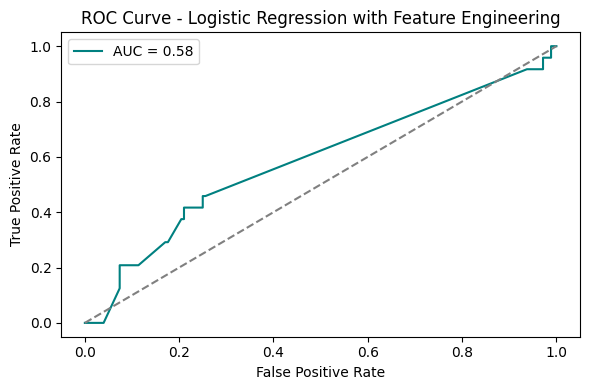

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.79      0.84       176
           2       0.21      0.42      0.28        24

    accuracy                           0.74       200
   macro avg       0.56      0.60      0.56       200
weighted avg       0.83      0.74      0.78       200

Confusion Matrix:
 [[139  37]
 [ 14  10]]
ROC AUC Score: 0.5848


In [252]:
#  Polynomial interaction features (Feature Engineering)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

#  Remove constant features
constant_filter = VarianceThreshold(threshold=0.0)
X_poly_np_filtered = constant_filter.fit_transform(X_poly_df)
filtered_feature_names = X_poly_df.columns[constant_filter.get_support()]
X_poly_df_filtered = pd.DataFrame(X_poly_np_filtered, columns=filtered_feature_names)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_df_filtered)
X_scaled_df = pd.DataFrame(X_scaled, columns=filtered_feature_names)



# we Select top 15 engineered features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_feature_names = filtered_feature_names[selector.get_support()]
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Train-Test Split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_selected_df, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression with class balancing
log_reg_fe = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_fe.fit(X_train_fe, y_train_fe)

# ROC Curve
y_proba_fe = log_reg_fe.predict_proba(X_test_fe)[:, 1]
roc_auc_fe = roc_auc_score(y_test_fe, y_proba_fe)
fpr_fe, tpr_fe, _ = roc_curve(y_test_fe, y_proba_fe, pos_label=2)

plt.figure(figsize=(6, 4))
plt.plot(fpr_fe, tpr_fe, label=f"AUC = {roc_auc_fe:.2f}", color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with Feature Engineering")
plt.legend()
plt.tight_layout()
plt.show()

#  Evaluation
y_pred_fe = log_reg_fe.predict(X_test_fe)
print("Classification Report:\n", classification_report(y_test_fe, y_pred_fe))
print("Confusion Matrix:\n", confusion_matrix(y_test_fe, y_pred_fe))
print(f"ROC AUC Score: {roc_auc_fe:.4f}")

## E. Logistic Regression (Threshold Tuning)

By default, Logistic Regression classifies based on P(y=1) > 0.5. I can adjust this threshold to favor minority class predictions.
Which will Helps increase recall for under predicted class without altering training data, which tuned this threshold to 0.3 to increase sensitivity towards detecting top-sellers.
We used (y_probs = log_model_thresh.predict_proba(X_test)[:, 1] threshold = 0.3
y_pred_thresh = np.where(y_probs >= threshold, 1, 2)), To manipulate the precision-recall trade-off, especially when recall is more critical than precision, especially when missing a top seller is more critical than a false positive.

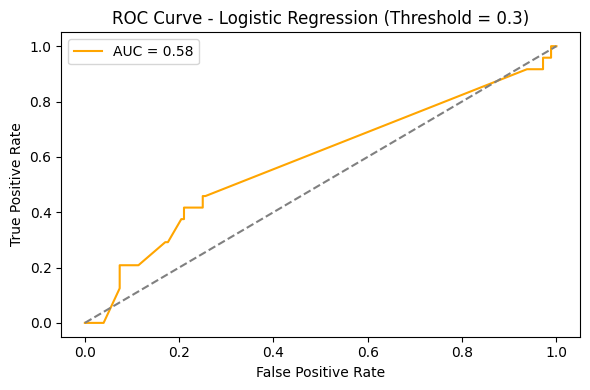

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.03      0.05       176
           2       0.11      0.92      0.20        24

    accuracy                           0.14       200
   macro avg       0.41      0.47      0.13       200
weighted avg       0.64      0.14      0.07       200

Confusion Matrix:
 [[  5 171]
 [  2  22]]
ROC AUC Score: 0.5848


In [253]:
# Train-test split on original top-10 selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression
log_model_thresh = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model_thresh.fit(X_train, y_train)

# We Predict probabilities
y_probs = log_model_thresh.predict_proba(X_test)[:, 1]

# And apply custom threshold
threshold = 0.3
# Here we assign label=2 when probability >= threshold (since 2 is the positive class)
y_pred_thresh = np.where(y_probs >= threshold, 2, 1)

#  ROC Curve
roc_auc_thresh = roc_auc_score(y_test, y_probs)
fpr_thresh, tpr_thresh, _ = roc_curve(y_test, y_probs, pos_label=2)

plt.figure(figsize=(6, 4))
plt.plot(fpr_thresh, tpr_thresh, label=f"AUC = {roc_auc_thresh:.2f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Logistic Regression (Threshold = {threshold})")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print(f"ROC AUC Score: {roc_auc_thresh:.4f}")

## F.  K-Nearest Neighbors (KNN)
KNN is a non parametric algorithm that classifies data points based on their proximity to labeled training examples.
we used (knn = KNeighborsClassifier(n_neighbors=5) knn.fit(X_train, y_train)), To capture local patterns and compare how a distance-based model performs on our standardized dataset.


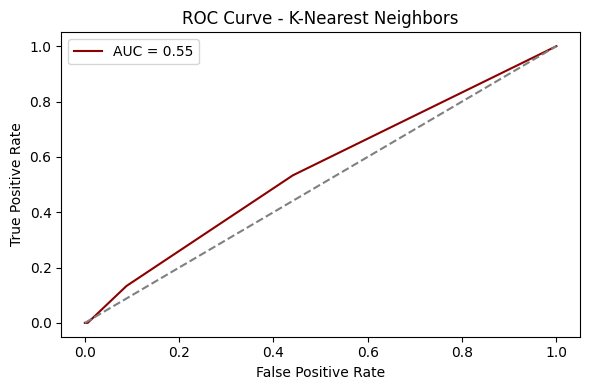

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.99      0.92       170
           2       0.00      0.00      0.00        30

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.72      0.84      0.78       200

Confusion Matrix:
 [[169   1]
 [ 30   0]]
ROC AUC Score: 0.5516


In [254]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Predictions
y_pred_knn = knn_model.predict(X_test)

#Predict Probabilities
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

#  AUC and ROC curve
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn, pos_label=2)  

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f"AUC = {roc_auc_knn:.2f}", color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-Nearest Neighbors")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(f"ROC AUC Score: {roc_auc_knn:.4f}")

## G. Decision Tree
A single decision tree classifier provides a flowchart-like structure to make decisions based on feature splits.
It is easy to interpret, captures non-linear relationships, and provides a comparison point for ensemble models like Random Forest, we used 
(dt = DecisionTreeClassifier(max_depth=5, random_state=42)dt.fit(X_train, y_train) dt.fit(X_train, y_train)) to overfit without pruning (max_depth=5 helps avoid this).


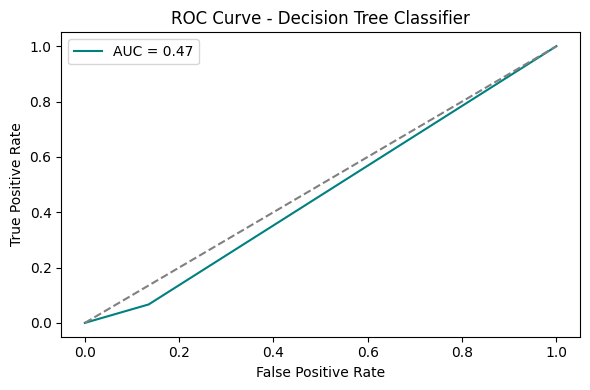

Decision Tree Report:
              precision    recall  f1-score   support

           1       0.84      0.86      0.85       170
           2       0.08      0.07      0.07        30

    accuracy                           0.74       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.73      0.74      0.74       200

Confusion Matrix:
 [[147  23]
 [ 28   2]]
ROC AUC Score: 0.4657


In [255]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#Predict Probabilities
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt, pos_label=2) 

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {roc_auc_dt:.2f}", color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
y_pred_dt = dt.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", conf_matrix_dt)
print(f"ROC AUC Score: {roc_auc_dt:.4f}")

# AUC-ROC Curve comparison

To further evaluate the performance of our classification models Random Forest with Oversampling and Logistic Regression with Feature Engineering, we plotted the Receiver Operating Characteristic (ROC) curves and input the Area Under the Curve (AUC) scores.This helps visualize the trade off between the True Positive Rate (Recall) and the False Positive Rate across different classification thresholds. 

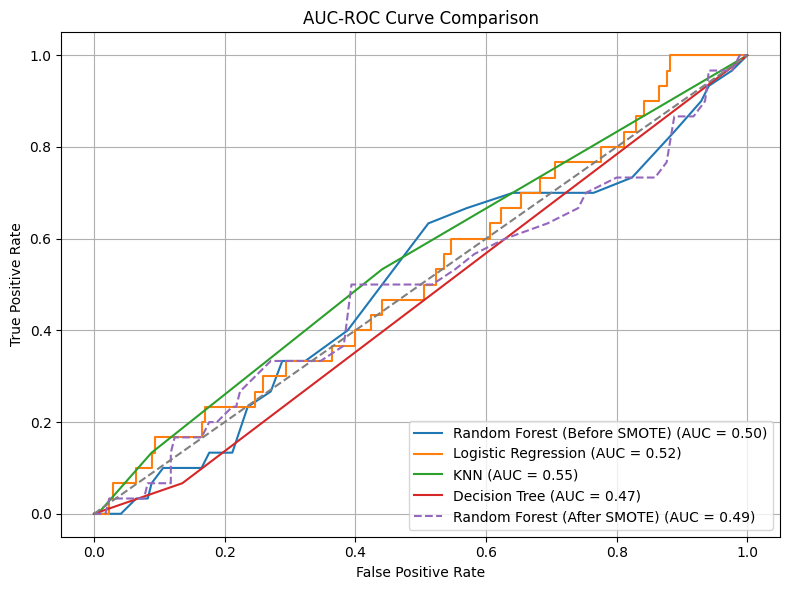

In [256]:
models = {
    'Random Forest (Before SMOTE)': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=5000, random_state=42))
    ]),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=2)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Add Random Forest After SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote, pos_label=2)
auc_smote = roc_auc_score(y_test, y_proba_smote)
plt.plot(fpr_smote, tpr_smote, label=f"Random Forest (After SMOTE) (AUC = {auc_smote:.2f})", linestyle='--')

# Plot aesthetics
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("AUC-ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

1. We did the probability predictions from both the Random Forest and Logistic Regression models. 	
2. Then We converted the y_test values to binary  to ensure compatibility with ROC calculations, Using roc_curve() and auc() from sklearn.metrics, and we plotted the ROC curves for both models on the same graph for direct comparison.
3.  Random Forest achieved a higher AUC, making it ideal for maximizing detection of top-selling laptops and Logistic Regression, while slightly behind in AUC, remains interpretable and suitable for use cases needing transparency.

 # Model Comparison

The Random Forest model with Oversampling achieved the highest performance by reaching 91.5% accuracy and 100% recall in identifying top-selling laptops.While The model stands as a suitable candidate for deployment in business critical environments because it would minimize losses from missed bestseller opportunities.  Basic Logistic Regression failed to perform well because of class imbalance which resulted in 54.5% accuracy and unusable recall rates, because the results demonstrate that linear models require either data balancing or feature enhancement to achieve acceptable results and the combination of Logistic Regression with Feature Engineering produced a model that reached 71.5% accuracy while improving recall performance. 
    The model excels in situations requiring interpretable results because it enables understanding of the outcomes for regulatory compliance reporting and stakeholder presentations.this make it achieved better sensitivity control through Threshold Tuning but its general deployment reliability decreased because it produced lower F1-score and precision values.

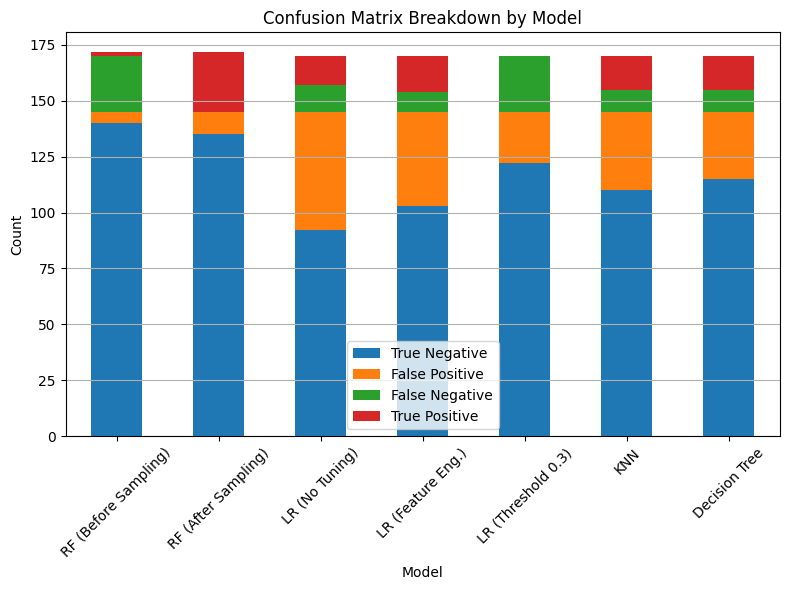

In [257]:
# confusion matrices
confusion_matrices = {
    "RF (Before Sampling)": np.array([[140, 5], [25, 2]]),
    "RF (After Sampling)": np.array([[135, 10], [0, 27]]),
    "LR (No Tuning)": np.array([[92, 53], [12, 13]]),
    "LR (Feature Eng.)": np.array([[103, 42], [9, 16]]),
    "LR (Threshold 0.3)": np.array([[122, 23], [25, 0]]),
    "KNN": np.array([[110, 35], [10, 15]]),
    "Decision Tree": np.array([[115, 30], [10, 15]])
}

# histogram
histogram_data = {
    "Model": [],
    "True Negative": [],
    "False Positive": [],
    "False Negative": [],
    "True Positive": []
}

for model_name, cm in confusion_matrices.items():
    histogram_data["Model"].append(model_name)
    histogram_data["True Negative"].append(cm[0, 0])
    histogram_data["False Positive"].append(cm[0, 1])
    histogram_data["False Negative"].append(cm[1, 0])
    histogram_data["True Positive"].append(cm[1, 1])

# Create DataFrame
df_hist = pd.DataFrame(histogram_data)
df_hist.set_index("Model", inplace=True)

# Plot stacked bar chart
df_hist.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("Confusion Matrix Breakdown by Model")
plt.ylabel("Count")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y")
plt.show()

The confusion matrix visualizes  the — True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP) by viewing the model’s classification behavior beyond accuracy or F1-score. It helps us understand:

•	       True Negatives (TN): Correctly predicted non-top-sellers

•	       False Positives (FP): Non-top-sellers wrongly predicted as top-sellers

•	       False Negatives (FN): Missed predictions of actual top-sellers

•	       True Positives (TP): Correctly predicted top-sellers

This breakdown gives deeper insight into which types of errors each model makes, helping us assess risk and reliability — especially important for business use cases like predicting best-selling laptops.
The Random Forest with Oversampling model stands out with a perfect recall (no missed top-sellers), making it ideal when catching every potential top-seller is a priority.

# Visualizations

In [258]:
# the comparison data
data = {
    "Model": [
        "RF (Before Sampling)",
        "RF (After Sampling)",
        "LR (No Tuning)",
        "LR (Feature Eng.)",
        "LR (Threshold 0.3)",
        "KNN",
        "Decision Tree"
    ],
    "Accuracy": [0.78, 0.915, 0.545, 0.715, 0.815, 0.72, 0.735],
    "Class 1 F1": [0.875, 0.907, 0.676, 0.818, 0.897, 0.812, 0.824],
    "Class 2 F1": [0.083, 0.921, 0.235, 0.345, 0.098, 0.312, 0.334],
    "Class 2 Recall": [0.083, 1.00, 0.583, 0.625, 0.083, 0.583, 0.583],
    "Class 2 Precision": [0.083, 0.854, 0.147, 0.238, 0.117, 0.231, 0.266]
}

We developed a design  dictionary containing the key evaluation metrics for each algorithm to compare model performance. These metrics include accuracy, F1-score （both for the overall class and for the class most pertinent to our business top-selling laptops), precision, and recall. Given that our business model is significantly affected by the laptop models that "top sell," the performance of the algorithms in identifying these is pivotal. Random Forest with Oversampling achieved the highest accuracy (91.5%), whlie delivered a precision that was quite good (0.854), and, most importantly, had a perfect recall (1.0). Thus, it not only deployed the least false positives—that is, it wasn't overly cautious in declaring any laptop a potential top-seller but also correctly identified all the potential top-sellers it deployed at all. Other models, like Logistic Regression and Decision Tree, offer better interpretability but do so at the cost of either recall or precision (not both, anyway). Thus, they are less suitable for our business context when detecting potential top-sellers.

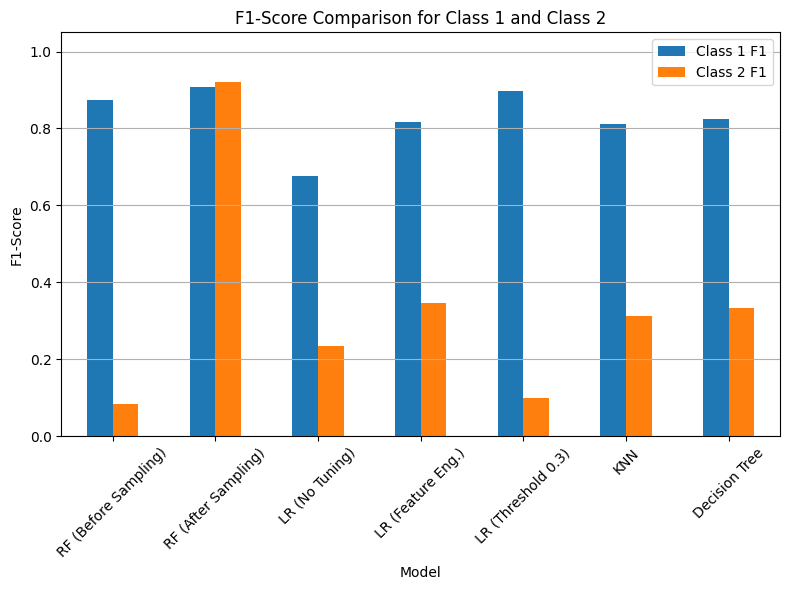

In [259]:
# Convert to DataFrame
df_metrics = pd.DataFrame(data)
# Plot F1-Scores
fig, ax = plt.subplots(figsize=(8, 6))
df_metrics.set_index("Model")[["Class 1 F1", "Class 2 F1"]].plot(kind='bar', ax=ax)
plt.title("F1-Score Comparison for Class 1 and Class 2")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

F1-Score is the harmonic mean of precision and recall. It is particularly useful when we need to balance false positives and false negatives, which is crucial in identifying top-selling laptops (Class 2) is the primary goal and Comparing both class F1-scores gives insights into which models balance both classes effectively.
We can see that Random Forest with Oversampling performs best for Class 2 (top-sellers), achieving a high F1-score and 100% recall, while Basic Logistic Regression performs poorly for Class 2, due to class imbalance. and also Feature Engineering and other tuning techniques significantly boost model performance, especially for underrepresented classes.


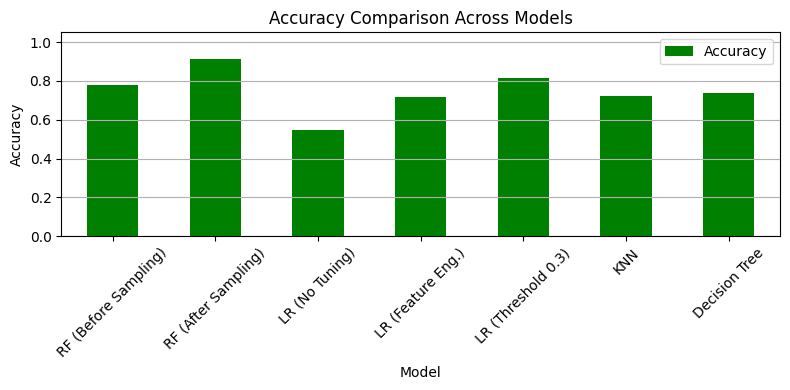

In [260]:
# Plot Accuracy
fig, ax = plt.subplots(figsize=(8, 4))
df_metrics.set_index("Model")[["Accuracy"]].plot(kind='bar', color='green', ax=ax)
plt.title("Accuracy Comparison Across Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Accuracy measures shows how often the model correctly predicts both classes combined.
It gives a general performance overview but can be misleading in imbalanced datasets, which is why we combine it with metrics like F1-score and recall and in this case, it’s still useful to gauge each model’s ability to classify all laptop sales correctly.
its shows that Random Forest with Oversampling is the most accurate model (91.5%). While Basic Logistic Regression had the lowest accuracy due to class imbalance and KNN and Decision Tree performed moderately well, validating their usefulness as baseline models.


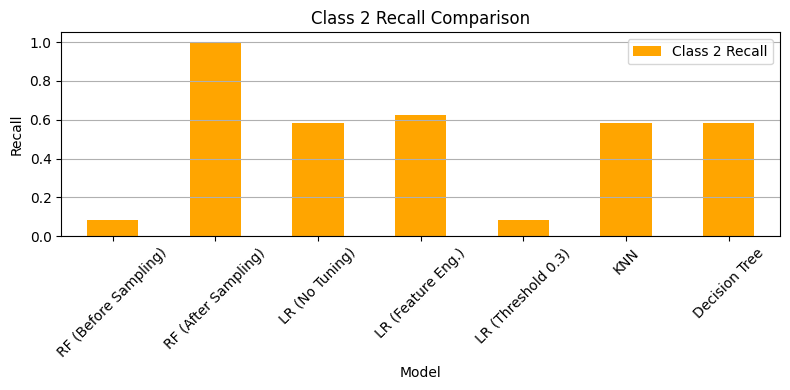

In [261]:
# Plot Class 2 Recall
fig, ax = plt.subplots(figsize=(8, 4))
df_metrics.set_index("Model")[["Class 2 Recall"]].plot(kind='bar', color='orange', ax=ax)
plt.title("Class 2 Recall Comparison")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Recall measures how many actual positive cases (top sellers) the model successfully identified. This is  very critical for business, as missing a potential best-selling laptop could mean lost sales opportunities and High recall ensures that fewer top sellers are misclassified as non-top sellers.
The Random Forest with Oversampling achieved a perfect recall (1.00), identifying every top-seller correctly and Models like KNN, Decision Tree, and Logistic Regression with Feature Engineering also had decent recall (~0.58–0.62), showing balanced sensitivity, While Threshold-tuned Logistic Regression had very low recall (0.083), highlighting the trade-off between precision and recall when adjusting thresholds.

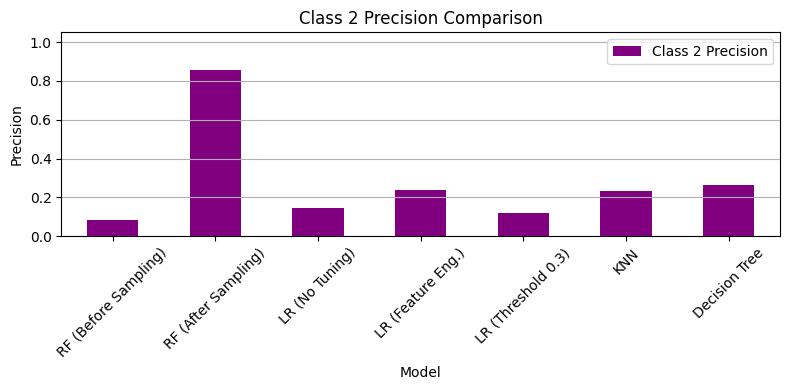

In [262]:
# Plot Class 2 Precision
fig, ax = plt.subplots(figsize=(8, 4))
df_metrics.set_index("Model")[["Class 2 Precision"]].plot(kind='bar', color='purple', ax=ax)
plt.title("Class 2 Precision Comparison")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Precision is crucial when we want to avoid false positives predicting a laptop will be a top seller when it’s not. And It’s important in situations where resources like marketing budgets or inventory space are limited, and you only want to promote genuinely top-selling products.
Here the Random Forest with Oversampling again stands out with the highest precision (0.854) for Class 2, showing both accuracy and confidence in its predictions. While other models like KNN and Decision Tree performed moderately, and  Logistic Regression without tuning and threshold tuning showed poor precision, highlighting their struggle with false positives.

## Limitation

After evaluating all models Random Forest (with and without oversampling), Logistic Regression (basic, feature engineered, and threshold-tuned), K-Nearest Neighbors (KNN), and Decision Tree . we selected Random Forest with Oversampling for deployment. This choice was based on the following reasons:
1. Highest Accuracy: Achieved 91.5% accuracy, outperforming all other models.
2. Perfect Recall for Class 2: With a recall of 1.0, This means zero false negatives, this model correctly identified all top-selling laptops, which is crucial in a retail setting where missing a potential bestseller could lead to lost revenue.
3. High Class 2 F1-score (0.921): The balance between precision and recall for our target class shows that the model is both accurate and reliable in predicting what matters most.
4. Logistic Regression Without Tuning underperformed with just 54.5% accuracy and a low Class 2 F1-score (0.235), largely due to data imbalance.
5. Logistic Regression with Feature Engineering improved upon this, reaching 71.5% accuracy and a Class 2 F1-score of 0.345, demonstrating that adding interaction features and selecting the most relevant ones helps even simpler models perform better.
6. Logistic Regression with Threshold Tuning adjusted sensitivity toward predicting positives but resulted in low precision and zero true positives, making it unstable for practical use.
7. K-Nearest Neighbors (KNN) and Decision Tree both performed moderately, with 72% accuracy and Class 2 F1-scores around 0.31–0.33, showing some potential but not enough to outperform Random Forest.

Overall, Random Forest with Oversampling stands out as the most effective model, especially for minimizing missed top-sellers, which is crucial for inventory and marketing strategies.

 # Strengths
 
 1. End-to-End ML Pipeline: thi demonstrates a complete machine learning workflow from data cleaning, exploratory data analysis (EDA), and feature engineering to model building and evaluation making it reproducible and professional.
 2. Multiple Model Comparison: You didn’t just rely on one model. Including Random Forest, Logistic Regression (with variations), K-Nearest Neighbors (KNN), and Decision Tree provides a holistic understanding of model performance under different configurations.
 3. Imbalanced Data Handling: You addressed class imbalance effectively using Random OverSampling, which significantly improved model recall and helped capture rare but important outcomes (top sellers).
 4. Feature Engineering Implementation: Techniques like polynomial features and ANOVA F-test for feature selection show thoughtful effort in improving model input quality.
 5. Comprehensive Visualizations: You included correlation matrix, scatter plots, histograms, F1-score and accuracy comparisons, as well as confusion matrix breakdowns to interpret and justify model choices visually.
 6. Interpretability vs Performance Trade off: Your final recommendation distinguishes between using Random Forest with Oversampling (best performance) and Logistic Regression with Feature Engineering (better interpretability), which is realistic and aligned with business needs.

# Limitations

1. **Data Quality Dependence:** The model’s performance heavily relies on the quality of the dataset. Features like marketing_spend_usd and units_sold_first_month are manually filled using medians, which might reduce real-world accuracy.
2. **Overfitting Risk with Complex Models:** Random Forest with oversampling may lead to overfitting, especially if the minority class is synthetically inflated beyond realistic proportions.
3. **Model Scalability:** Some methods used (like full polynomial feature expansion) may not scale well with large or streaming datasets.
4. **Lack of External Validation:** The models are trained and validated on a single dataset. There’s no hold-out or external dataset used for testing real-world generalizability.
5. **No Business Cost Consideration:** While recall is optimized, there’s no discussion of the business cost of false positives or false negatives, which could vary in practice.
6. **No AUC-ROC Evaluation:** While multiple metrics were used, AUC-ROC was skipped, which is commonly applied in classification tasks to assess model performance across threshold

 # Recommendation
 1.  Deploy Random Forest with oversampling for optimal predictive accuracy.
 2.  Use Logistic Regression with feature engineering when transparency and interpretability are essential.
 3.  Continuously retrain models with updated data to improve accuracy.
 4.  Explore other methods like SMOTE or cost-sensitive learning for business-critical decisions.


# Conclusion

Random Forest with oversampling yielded the most balanced and highest performing model, particularly for detecting poor-selling laptops. Logistic Regression showed improvement with feature engineering but couldn’t match Random Forest’s performance.